In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# <font color='skyblue'>Problem 1:</font>

In [16]:
# define needed variables
steps = 1000
a = 0.02
b = 0.25
c = -65
d = 8
V = -64
TAU = 0.25
u = b * V

### 1a:

In [23]:
def regular_neuron_spiking(row, u, V, VV, uu, spike_ts, T1=0, I=0.0):
    for t in np.linspace(0, steps, 4001): # 4001 since we need to draw 4 charts
        if t > T1:
            I = I
        V += TAU * (0.04 * (V**2) + 5 * V + 140 - u + (I * 1.0))
        u += TAU * a * b * (b * V - u)
        if V > 30:
            VV.append(30)
            V = c
            u = u + d
            spike_ts.append(1)
        else:
            VV.append(V)
            spike_ts.append(0)
        uu.append(u)
        
    data_neutron_spiking = pd.DataFrame({'x' : np.linspace(0, steps, 4001), 'y' : VV})
    data_neutron_spiking.plot.line('x', 'y', rot=0, figsize=(20, 5))
    plt.xlabel('')
    return sum(VV[800:])/800

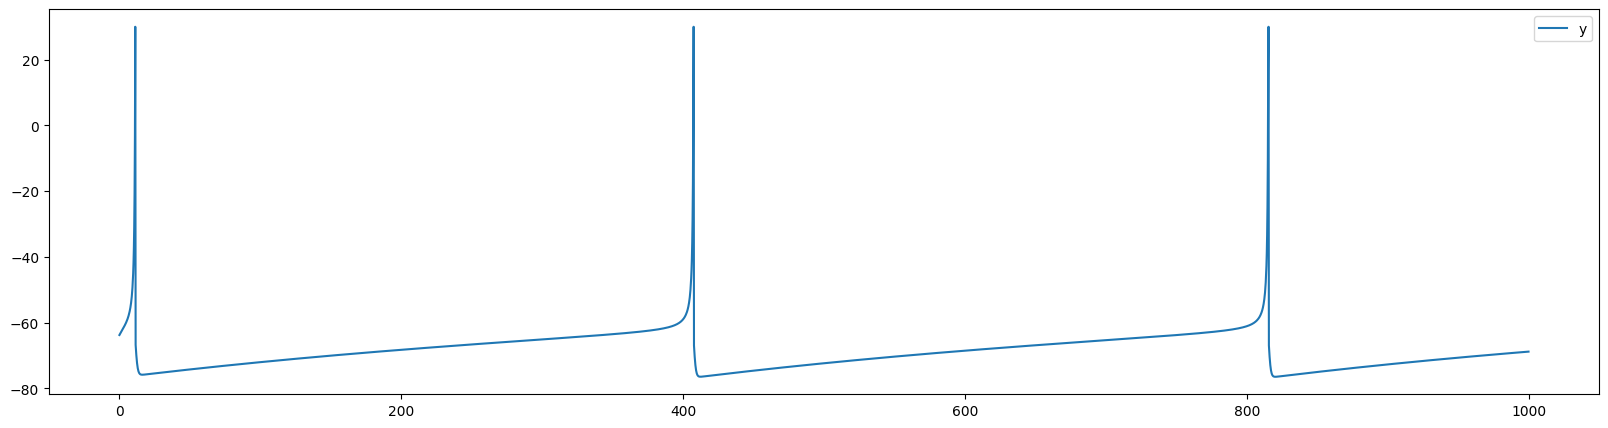

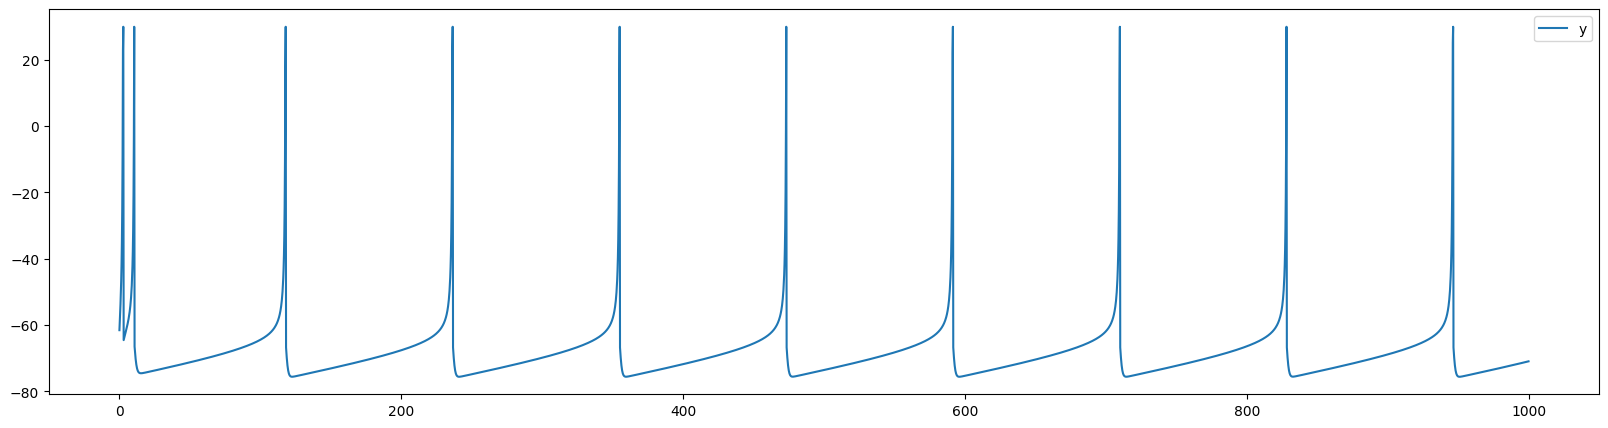

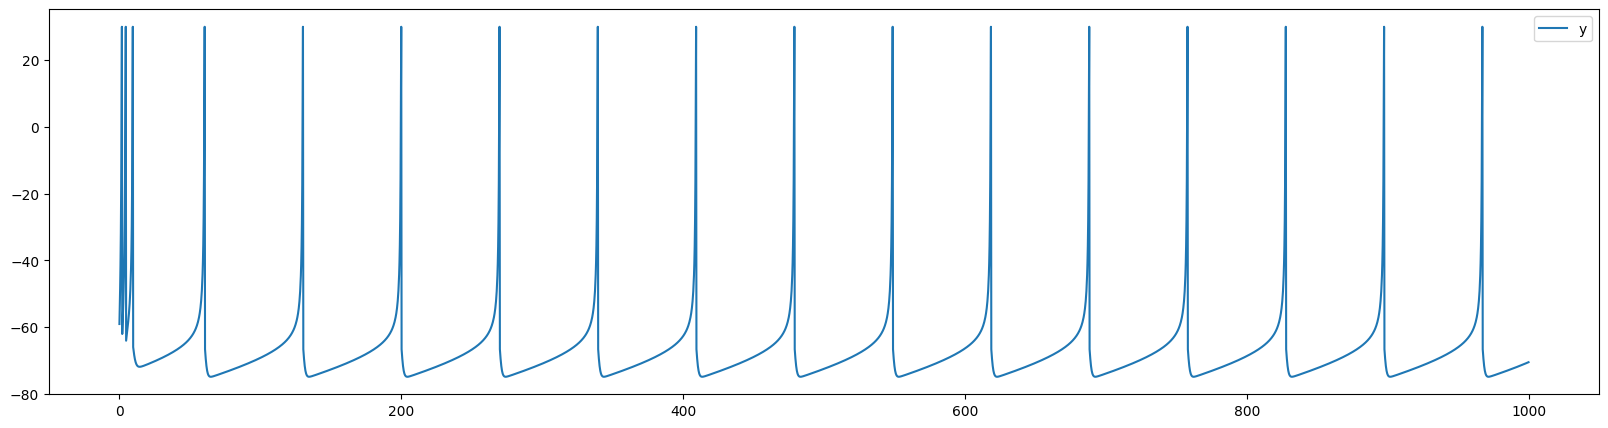

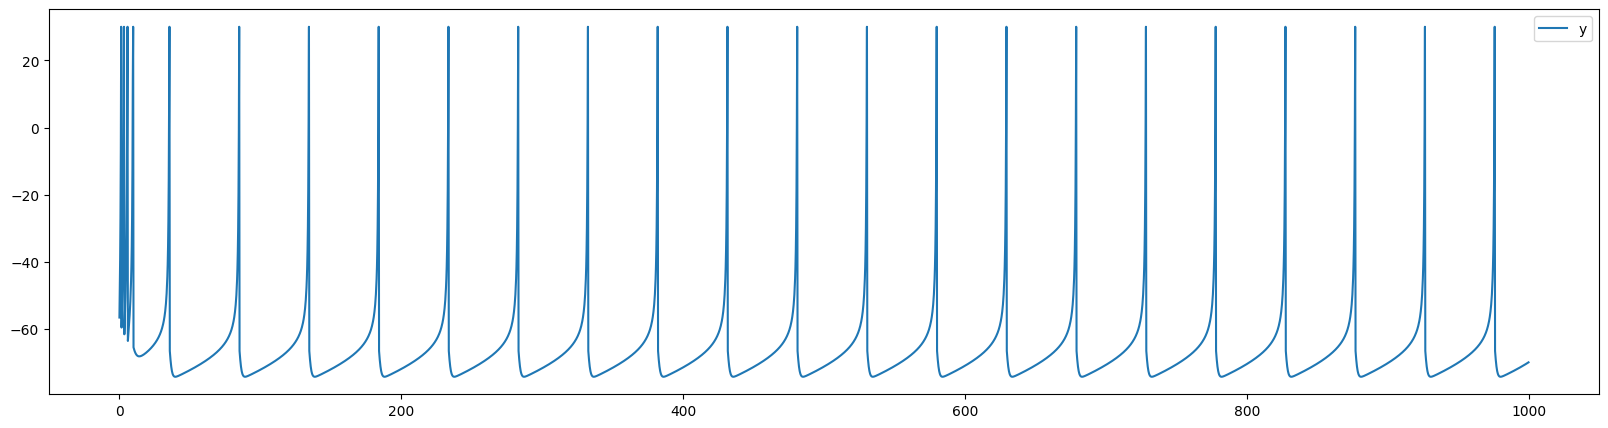

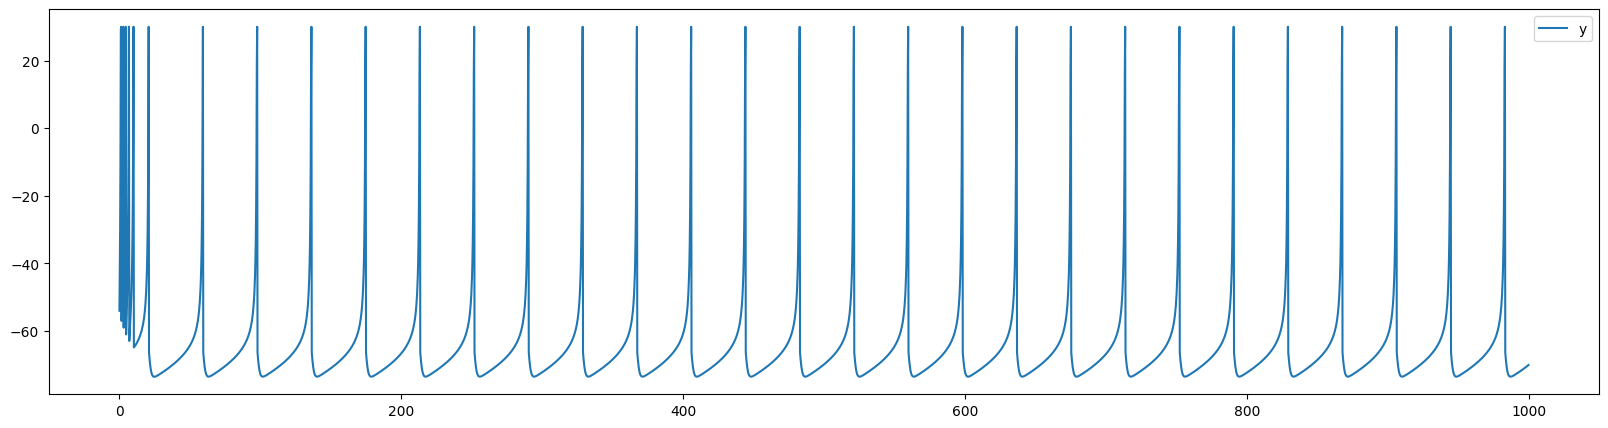

In [24]:
row = 0
II = [1, 10, 20, 30, 40]
RR = []
for i in II:
    R = regular_neuron_spiking(row, u, V, [], [], [], I=i)
    row += 1
    RR.append(R)
plt.savefig('problem1a.png')

### 1b: